The goal of this project is to look at a few different Hip Hop albums and compare some of the audio features that I think would correlate to a more popular song, or a "hit" song if you will.My plan is to grab all of the tracks from 3 albums from some on the biggest artists out right now. My criteria was albums that came out this year. This was because the popularity key from Spotify counts recent listens, not overall listens. For example, a song that came out and was a number one song 10 years ago may have a lower popularity then a somewhat new popular song because of how recent the plays are. I had to take this into account when choosing these albums. Spotify has quite a few differnet audio features, so I had to go look through the API and see what all of them actually mean. I decided on 4 features that I though might actually have an effect on whether a song is popular or not.

To start off the report, I imported anything that I might be needing in order to complete this project, as well as getting all of the spotify session stuff together.

In [2]:
import json
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import base64
import requests

In [3]:
keys = pd.read_csv("Spotify-Keys_10-18-22.txt", header = 0, sep = ",")
appid = keys['Client_ID'][0]
appsecret = keys['Client_Secret'][0]
client_cred = base64.b64encode(str(appid + ":" + appsecret).encode('ascii'))
header = {'Authorization': 'Basic {}'.format(client_cred.decode('ascii'))}
payload = {'grant_type' : 'client_credentials'}
access_token_url = "https://accounts.spotify.com/api/token"
response = requests.post(access_token_url, headers = header, data = payload)
session_token = response.json()['access_token']
session_header = {'Authorization': 'Bearer {}'.format(response.json()['access_token'])}

The three albums that I chose for this project were as follows: Vinyl Days by Logic, Her Loss by Drake, and King's Disease 3 by Nas. I chose these albums for a few different reasons. I know all three artists are very popular and good hip hip artists. Another reason is that the ratings for the albums from critics were all generally good, so I would figure that means that it would give me a better chance of seeing a correlation if any. In these next few cells of code I went through, got all the albums audio features and threw them into their own data frames using Pandas.

In [4]:
#Logic: Vinyl Days
days_id = '0RTHMVF27KRMHIGnF7iLru'
album_tracks_endpoint = "https://api.spotify.com/v1/albums/{}/tracks".format(days_id)
days_tracks = requests.get(album_tracks_endpoint, headers = session_header)
print(days_tracks.status_code)
days_dict = json.loads(days_tracks.text)
days_track_ids = [x['id'] for x in days_dict['items']]
days_track_strings = ','.join(str(x) for x in days_track_ids)
print(days_track_strings)
track_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(days_track_strings)

200
0xjp9Li9jmlykJNrIlAnqe,7tQpKKS4Jis0pCotemeLdz,6FoyBTuvyX2YFw4QW1e6DK,6yiCFprNLeKraW5RsYUxiE,6nI37NimdoCoRvPwxXZaMt,1LFDDwqjZtSzjXWIYXbY5O,0IBHTkmEQCLGHJaWs1tuEg,3RTCSJf6MKrEXNjws0G6Ou,5ZK1XF3s2KrFw63RBf6ciX,0XfjQgy46bjlJ4bOOenNS6,4VlMA2A8JRZnSI4Owdbnau,7xeic9Mig0gIkpMlMV4G0i,0mvWpmMlAcxHkjLu9yXdoS,6Rn5ruN2hIMqx9U8JNVHGz,4Fs7O2jQCQMgU3uka3Qeci,7Bi5CtEcDIduA53TdPHMLF,4XvqNiFFUcS50jjVz3enH7,2Gt5hPrCYs1VxXFRzCFF2N,6CDIIpcpMfERHtf4MOdxr7,13cRWsPNUmbgcSMPgOibVJ


In [5]:
days_features = requests.get(track_features_endpoint, headers = session_header)
days_dict = json.loads(days_features.text)
days_dict['audio_features'][0]

{'danceability': 0.461,
 'energy': 0.937,
 'key': 6,
 'loudness': -5.065,
 'mode': 1,
 'speechiness': 0.468,
 'acousticness': 0.112,
 'instrumentalness': 0.000964,
 'liveness': 0.111,
 'valence': 0.547,
 'tempo': 164.73,
 'type': 'audio_features',
 'id': '0xjp9Li9jmlykJNrIlAnqe',
 'uri': 'spotify:track:0xjp9Li9jmlykJNrIlAnqe',
 'track_href': 'https://api.spotify.com/v1/tracks/0xjp9Li9jmlykJNrIlAnqe',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0xjp9Li9jmlykJNrIlAnqe',
 'duration_ms': 44333,
 'time_signature': 5}

In [6]:
days_df = pd.DataFrame(days_dict['audio_features'])
days_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.461,0.937,6,-5.065,1,0.468,0.1120,0.000964,0.111,0.547,164.730,audio_features,0xjp9Li9jmlykJNrIlAnqe,spotify:track:0xjp9Li9jmlykJNrIlAnqe,https://api.spotify.com/v1/tracks/0xjp9Li9jmly...,https://api.spotify.com/v1/audio-analysis/0xjp...,44333,5
1,0.708,0.980,6,-3.122,1,0.251,0.1180,0.000000,0.614,0.585,96.879,audio_features,7tQpKKS4Jis0pCotemeLdz,spotify:track:7tQpKKS4Jis0pCotemeLdz,https://api.spotify.com/v1/tracks/7tQpKKS4Jis0...,https://api.spotify.com/v1/audio-analysis/7tQp...,124974,4
2,0.659,0.884,6,-3.710,0,0.283,0.5390,0.000000,0.260,0.826,93.367,audio_features,6FoyBTuvyX2YFw4QW1e6DK,spotify:track:6FoyBTuvyX2YFw4QW1e6DK,https://api.spotify.com/v1/tracks/6FoyBTuvyX2Y...,https://api.spotify.com/v1/audio-analysis/6Foy...,108387,4
3,0.364,0.745,9,-5.842,0,0.240,0.0413,0.000000,0.442,0.517,90.951,audio_features,6yiCFprNLeKraW5RsYUxiE,spotify:track:6yiCFprNLeKraW5RsYUxiE,https://api.spotify.com/v1/tracks/6yiCFprNLeKr...,https://api.spotify.com/v1/audio-analysis/6yiC...,148597,3
4,0.561,0.947,7,-3.476,1,0.258,0.2570,0.938000,0.272,0.664,97.896,audio_features,6nI37NimdoCoRvPwxXZaMt,spotify:track:6nI37NimdoCoRvPwxXZaMt,https://api.spotify.com/v1/tracks/6nI37NimdoCo...,https://api.spotify.com/v1/audio-analysis/6nI3...,19606,4


In [7]:
#Drake's Her Loss
loss_id = '5MS3MvWHJ3lOZPLiMxzOU6'
album_tracks_endpoint = "https://api.spotify.com/v1/albums/{}/tracks".format(loss_id)
loss_tracks = requests.get(album_tracks_endpoint, headers = session_header)
print(loss_tracks.status_code)
loss_dict = json.loads(loss_tracks.text)
loss_track_ids = [x['id'] for x in loss_dict['items']]
loss_track_strings = ','.join(str(x) for x in loss_track_ids)
print(loss_track_strings)
track_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(loss_track_strings)

200
1bDbXMyjaUIooNwFE9wn0N,46s57QULU02Voy0Kup6UEb,34tz0eDhGuFErIuW3q4mPX,0wshkEEcJUQU33RSRBb5dv,7l2nxyx7IkBX5orhkALg0V,2ZL7WZcjuYKi1KUDtp4kCC,0sSRLXxknVTQDStgU1NqpY,4Flfb4fGscN9kXPOduQLrv,7GeTsDIc5ykNB6lORO6Cee,2KLwPaRDOB87XOYAT2fgxh,45pUWUeEWGoSdH6UF162G8,410TZrK18uRjtsTunG14cl,2ZlABhxMMa43COmZ97kKsJ,29YW2xXlo6Pc6M0SBTCXYN,1MTXYvJ9TSqg9x6WPCDx2n,31bsuKDOzFGzBAoXxtnAJm


In [8]:
loss_features = requests.get(track_features_endpoint, headers = session_header)
loss_dict = json.loads(loss_features.text)
loss_dict['audio_features'][0]

{'danceability': 0.561,
 'energy': 0.52,
 'key': 11,
 'loudness': -9.342,
 'mode': 0,
 'speechiness': 0.244,
 'acousticness': 0.0503,
 'instrumentalness': 1.86e-06,
 'liveness': 0.355,
 'valence': 0.424,
 'tempo': 153.15,
 'type': 'audio_features',
 'id': '1bDbXMyjaUIooNwFE9wn0N',
 'uri': 'spotify:track:1bDbXMyjaUIooNwFE9wn0N',
 'track_href': 'https://api.spotify.com/v1/tracks/1bDbXMyjaUIooNwFE9wn0N',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1bDbXMyjaUIooNwFE9wn0N',
 'duration_ms': 239360,
 'time_signature': 3}

In [9]:
loss_df = pd.DataFrame(loss_dict['audio_features'])
loss_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.561,0.520,11,-9.342,0,0.244,0.05030,0.000002,0.3550,0.424,153.150,audio_features,1bDbXMyjaUIooNwFE9wn0N,spotify:track:1bDbXMyjaUIooNwFE9wn0N,https://api.spotify.com/v1/tracks/1bDbXMyjaUIo...,https://api.spotify.com/v1/audio-analysis/1bDb...,239360,3
1,0.908,0.546,8,-10.491,0,0.323,0.01270,0.000000,0.0707,0.225,131.016,audio_features,46s57QULU02Voy0Kup6UEb,spotify:track:46s57QULU02Voy0Kup6UEb,https://api.spotify.com/v1/tracks/46s57QULU02V...,https://api.spotify.com/v1/audio-analysis/46s5...,170502,4
2,0.841,0.358,9,-8.368,1,0.591,0.02010,0.000000,0.3900,0.329,158.014,audio_features,34tz0eDhGuFErIuW3q4mPX,spotify:track:34tz0eDhGuFErIuW3q4mPX,https://api.spotify.com/v1/tracks/34tz0eDhGuFE...,https://api.spotify.com/v1/audio-analysis/34tz...,261544,4
3,0.849,0.433,5,-8.434,0,0.316,0.04070,0.000000,0.3880,0.395,142.110,audio_features,0wshkEEcJUQU33RSRBb5dv,spotify:track:0wshkEEcJUQU33RSRBb5dv,https://api.spotify.com/v1/tracks/0wshkEEcJUQU...,https://api.spotify.com/v1/audio-analysis/0wsh...,152962,4
4,0.934,0.614,5,-7.384,1,0.198,0.00274,0.000000,0.1230,0.616,144.045,audio_features,7l2nxyx7IkBX5orhkALg0V,spotify:track:7l2nxyx7IkBX5orhkALg0V,https://api.spotify.com/v1/tracks/7l2nxyx7IkBX...,https://api.spotify.com/v1/audio-analysis/7l2n...,160821,4


In [10]:
#Nas' King's Disease 3
king_id = '3vQuGKQJMfdXmkjRKqUesk'
album_tracks_endpoint = "https://api.spotify.com/v1/albums/{}/tracks".format(king_id)
king_tracks = requests.get(album_tracks_endpoint, headers = session_header)
print(king_tracks.status_code)
king_dict = json.loads(king_tracks.text)
king_track_ids = [x['id'] for x in king_dict['items']]
king_track_strings = ','.join(str(x) for x in king_track_ids)
print(king_track_strings)
track_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(king_track_strings)

200
0qHXyED9mnRk3DnXowUe6Y,0N7KYoFclzCaF5COp7BIlH,6tSemeCMDHYp5gqmKDJcn2,5MfCvL6jCTkxPCBQf3OkYH,0ANy8lwyUDIfWvLZy6g9qd,6wkcCWy0qkFbIpHNh6dBg5,5IITkOxqG4qbxASeYUlQdr,3iGOhMMCQ2nOMkra3Bpo0f,3H6ULj4SwNvFIBgMEzjWMP,4w1bfkfaTMFl3P7JWx2ht3,6rD0WAb9gy7LREkOduQC16,44NRxh8pJUtBRTAQU37irX,3iuBfAec9qN2UylQv9NcKR,0SDeT0QjNake7gJLDAOLcG,2R4eQAxpjeJohoHc6cUBzl,4QpROyTQgJxmzIe0W7othA,0hXDGoxfMhhqHZ7l1HprJ4


In [11]:
king_features = requests.get(track_features_endpoint, headers = session_header)
king_dict = json.loads(king_features.text)
king_dict['audio_features'][0]

{'danceability': 0.561,
 'energy': 0.922,
 'key': 10,
 'loudness': -3.941,
 'mode': 0,
 'speechiness': 0.317,
 'acousticness': 0.0116,
 'instrumentalness': 0,
 'liveness': 0.192,
 'valence': 0.817,
 'tempo': 92.289,
 'type': 'audio_features',
 'id': '0qHXyED9mnRk3DnXowUe6Y',
 'uri': 'spotify:track:0qHXyED9mnRk3DnXowUe6Y',
 'track_href': 'https://api.spotify.com/v1/tracks/0qHXyED9mnRk3DnXowUe6Y',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0qHXyED9mnRk3DnXowUe6Y',
 'duration_ms': 156972,
 'time_signature': 4}

In [12]:
king_df = pd.DataFrame(king_dict['audio_features'])
king_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.561,0.922,10,-3.941,0,0.317,0.0116,0,0.192,0.817,92.289,audio_features,0qHXyED9mnRk3DnXowUe6Y,spotify:track:0qHXyED9mnRk3DnXowUe6Y,https://api.spotify.com/v1/tracks/0qHXyED9mnRk...,https://api.spotify.com/v1/audio-analysis/0qHX...,156972,4
1,0.428,0.925,2,-3.742,1,0.472,0.2100,0,0.451,0.392,83.508,audio_features,0N7KYoFclzCaF5COp7BIlH,spotify:track:0N7KYoFclzCaF5COp7BIlH,https://api.spotify.com/v1/tracks/0N7KYoFclzCa...,https://api.spotify.com/v1/audio-analysis/0N7K...,202804,4
2,0.737,0.947,10,-1.588,0,0.324,0.1870,0,0.196,0.742,92.090,audio_features,6tSemeCMDHYp5gqmKDJcn2,spotify:track:6tSemeCMDHYp5gqmKDJcn2,https://api.spotify.com/v1/tracks/6tSemeCMDHYp...,https://api.spotify.com/v1/audio-analysis/6tSe...,206107,4
3,0.681,0.848,1,-4.222,0,0.305,0.0120,0,0.147,0.288,93.334,audio_features,5MfCvL6jCTkxPCBQf3OkYH,spotify:track:5MfCvL6jCTkxPCBQf3OkYH,https://api.spotify.com/v1/tracks/5MfCvL6jCTkx...,https://api.spotify.com/v1/audio-analysis/5MfC...,167724,4
4,0.529,0.703,5,-4.019,0,0.052,0.0093,0,0.215,0.101,113.960,audio_features,0ANy8lwyUDIfWvLZy6g9qd,spotify:track:0ANy8lwyUDIfWvLZy6g9qd,https://api.spotify.com/v1/tracks/0ANy8lwyUDIf...,https://api.spotify.com/v1/audio-analysis/0ANy...,138962,4


In these next few code cells I am getting each tracks popularity and making a data frame out of them. I am then adding them to out existing data frames and removing certain audio features that I did not want to include. The result will be the final data frames that we will be working with.

In [13]:
#Logic: Vinyl Days
#Getting track's popularity
days_id = '0RTHMVF27KRMHIGnF7iLru'
album_tracks_endpoint = "https://api.spotify.com/v1/albums/{}/tracks".format(days_id)
days_tracks = requests.get(album_tracks_endpoint, headers = session_header)
print(days_tracks.status_code)
days_dict = json.loads(days_tracks.text)
days_track_ids = [x['id'] for x in days_dict['items']]
days_track_strings = ','.join(str(x) for x in days_track_ids)
print(days_track_strings)
track_pop_endpoint = "https://api.spotify.com/v1/tracks?ids={}".format(days_track_strings)

200
0xjp9Li9jmlykJNrIlAnqe,7tQpKKS4Jis0pCotemeLdz,6FoyBTuvyX2YFw4QW1e6DK,6yiCFprNLeKraW5RsYUxiE,6nI37NimdoCoRvPwxXZaMt,1LFDDwqjZtSzjXWIYXbY5O,0IBHTkmEQCLGHJaWs1tuEg,3RTCSJf6MKrEXNjws0G6Ou,5ZK1XF3s2KrFw63RBf6ciX,0XfjQgy46bjlJ4bOOenNS6,4VlMA2A8JRZnSI4Owdbnau,7xeic9Mig0gIkpMlMV4G0i,0mvWpmMlAcxHkjLu9yXdoS,6Rn5ruN2hIMqx9U8JNVHGz,4Fs7O2jQCQMgU3uka3Qeci,7Bi5CtEcDIduA53TdPHMLF,4XvqNiFFUcS50jjVz3enH7,2Gt5hPrCYs1VxXFRzCFF2N,6CDIIpcpMfERHtf4MOdxr7,13cRWsPNUmbgcSMPgOibVJ


In [14]:
days_pop = requests.get(track_pop_endpoint, headers = session_header)
days_dict = json.loads(days_pop.text)
days_dict['tracks'][0]['popularity']

43

In [15]:
days_p_df = pd.DataFrame(days_dict['tracks'])
days_p_df.head()

,album,artists,available_markets,disc_number,duration_ms,explicit,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,track_number,type,uri
0,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,44333,True,{'isrc': 'USUM72208929'},{'spotify': 'https://open.spotify.com/track/0x...,https://api.spotify.com/v1/tracks/0xjp9Li9jmly...,0xjp9Li9jmlykJNrIlAnqe,False,Danger,43,None,1,track,spotify:track:0xjp9Li9jmlykJNrIlAnqe
1,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,124973,True,{'isrc': 'USUM72206087'},{'spotify': 'https://open.spotify.com/track/7t...,https://api.spotify.com/v1/tracks/7tQpKKS4Jis0...,7tQpKKS4Jis0pCotemeLdz,False,Tetris,57,None,2,track,spotify:track:7tQpKKS4Jis0pCotemeLdz
2,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,108387,True,{'isrc': 'USUM72208931'},{'spotify': 'https://open.spotify.com/track/6F...,https://api.spotify.com/v1/tracks/6FoyBTuvyX2Y...,6FoyBTuvyX2YFw4QW1e6DK,False,In my lifetime (feat. Action Bronson),56,None,3,track,spotify:track:6FoyBTuvyX2YFw4QW1e6DK
3,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,148597,True,{'isrc': 'USUM72206089'},{'spotify': 'https://open.spotify.com/track/6y...,https://api.spotify.com/v1/tracks/6yiCFprNLeKr...,6yiCFprNLeKraW5RsYUxiE,False,Decades,47,None,4,track,spotify:track:6yiCFprNLeKraW5RsYUxiE
4,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,19606,True,{'isrc': 'USUM72208933'},{'spotify': 'https://open.spotify.com/track/6n...,https://api.spotify.com/v1/tracks/6nI37NimdoCo...,6nI37NimdoCoRvPwxXZaMt,False,JJ Abrahams,2,None,5,track,spotify:track:6nI37NimdoCoRvPwxXZaMt


In [16]:
days_pop_df = days_p_df[['popularity','id']]
days_pop_df

,popularity,id
0,43,0xjp9Li9jmlykJNrIlAnqe
1,57,7tQpKKS4Jis0pCotemeLdz
2,56,6FoyBTuvyX2YFw4QW1e6DK
3,47,6yiCFprNLeKraW5RsYUxiE
4,2,6nI37NimdoCoRvPwxXZaMt
5,53,1LFDDwqjZtSzjXWIYXbY5O
6,44,0IBHTkmEQCLGHJaWs1tuEg
7,48,3RTCSJf6MKrEXNjws0G6Ou
8,44,5ZK1XF3s2KrFw63RBf6ciX
9,3,0XfjQgy46bjlJ4bOOenNS6


In [17]:
#Drake's Her Loss
#Getting track's popularity
loss_id = '5MS3MvWHJ3lOZPLiMxzOU6'
album_tracks_endpoint = "https://api.spotify.com/v1/albums/{}/tracks".format(loss_id)
loss_tracks = requests.get(album_tracks_endpoint, headers = session_header)
print(loss_tracks.status_code)
loss_dict = json.loads(loss_tracks.text)
loss_track_ids = [x['id'] for x in loss_dict['items']]
loss_track_strings = ','.join(str(x) for x in loss_track_ids)
print(loss_track_strings)
track_pop_endpoint = "https://api.spotify.com/v1/tracks?ids={}".format(loss_track_strings)

200
1bDbXMyjaUIooNwFE9wn0N,46s57QULU02Voy0Kup6UEb,34tz0eDhGuFErIuW3q4mPX,0wshkEEcJUQU33RSRBb5dv,7l2nxyx7IkBX5orhkALg0V,2ZL7WZcjuYKi1KUDtp4kCC,0sSRLXxknVTQDStgU1NqpY,4Flfb4fGscN9kXPOduQLrv,7GeTsDIc5ykNB6lORO6Cee,2KLwPaRDOB87XOYAT2fgxh,45pUWUeEWGoSdH6UF162G8,410TZrK18uRjtsTunG14cl,2ZlABhxMMa43COmZ97kKsJ,29YW2xXlo6Pc6M0SBTCXYN,1MTXYvJ9TSqg9x6WPCDx2n,31bsuKDOzFGzBAoXxtnAJm


In [18]:
loss_pop = requests.get(track_pop_endpoint, headers = session_header)
loss_dict = json.loads(loss_pop.text)
loss_dict['tracks'][0]['popularity']

96

In [19]:
loss_p_df = pd.DataFrame(loss_dict['tracks'])
loss_pop_df = loss_p_df[['popularity','id']]
loss_pop_df

,popularity,id
0,96,1bDbXMyjaUIooNwFE9wn0N
1,89,46s57QULU02Voy0Kup6UEb
2,88,34tz0eDhGuFErIuW3q4mPX
3,85,0wshkEEcJUQU33RSRBb5dv
4,85,7l2nxyx7IkBX5orhkALg0V
5,87,2ZL7WZcjuYKi1KUDtp4kCC
6,83,0sSRLXxknVTQDStgU1NqpY
7,82,4Flfb4fGscN9kXPOduQLrv
8,87,7GeTsDIc5ykNB6lORO6Cee
9,89,2KLwPaRDOB87XOYAT2fgxh


In [20]:
#Nas' King's Disease 3
#Getting track's popularity
king_id = '3vQuGKQJMfdXmkjRKqUesk'
album_tracks_endpoint = "https://api.spotify.com/v1/albums/{}/tracks".format(king_id)
king_tracks = requests.get(album_tracks_endpoint, headers = session_header)
print(king_tracks.status_code)
king_dict = json.loads(king_tracks.text)
king_track_ids = [x['id'] for x in king_dict['items']]
king_track_strings = ','.join(str(x) for x in king_track_ids)
print(king_track_strings)
track_pop_endpoint = "https://api.spotify.com/v1/tracks?ids={}".format(king_track_strings)

200
0qHXyED9mnRk3DnXowUe6Y,0N7KYoFclzCaF5COp7BIlH,6tSemeCMDHYp5gqmKDJcn2,5MfCvL6jCTkxPCBQf3OkYH,0ANy8lwyUDIfWvLZy6g9qd,6wkcCWy0qkFbIpHNh6dBg5,5IITkOxqG4qbxASeYUlQdr,3iGOhMMCQ2nOMkra3Bpo0f,3H6ULj4SwNvFIBgMEzjWMP,4w1bfkfaTMFl3P7JWx2ht3,6rD0WAb9gy7LREkOduQC16,44NRxh8pJUtBRTAQU37irX,3iuBfAec9qN2UylQv9NcKR,0SDeT0QjNake7gJLDAOLcG,2R4eQAxpjeJohoHc6cUBzl,4QpROyTQgJxmzIe0W7othA,0hXDGoxfMhhqHZ7l1HprJ4


In [21]:
king_pop = requests.get(track_pop_endpoint, headers = session_header)
king_dict = json.loads(king_pop.text)
king_dict['tracks'][0]['popularity']

64

In [22]:
king_p_df = pd.DataFrame(king_dict['tracks'])
king_pop_df = king_p_df[['popularity','id']]
king_pop_df

,popularity,id
0,64,0qHXyED9mnRk3DnXowUe6Y
1,65,0N7KYoFclzCaF5COp7BIlH
2,65,6tSemeCMDHYp5gqmKDJcn2
3,68,5MfCvL6jCTkxPCBQf3OkYH
4,64,0ANy8lwyUDIfWvLZy6g9qd
5,62,6wkcCWy0qkFbIpHNh6dBg5
6,62,5IITkOxqG4qbxASeYUlQdr
7,62,3iGOhMMCQ2nOMkra3Bpo0f
8,60,3H6ULj4SwNvFIBgMEzjWMP
9,61,4w1bfkfaTMFl3P7JWx2ht3


In [23]:
d_days_df = days_df.drop(['type','mode','key','uri','track_href','analysis_url','time_signature','liveness','instrumentalness','acousticness','speechiness','loudness','tempo'], axis = 1)
d_loss_df = loss_df.drop(['type','mode','key','uri','track_href','analysis_url','time_signature','liveness','instrumentalness','acousticness','speechiness','loudness','tempo'], axis = 1)
d_king_df = king_df.drop(['type','mode','key','uri','track_href','analysis_url','time_signature','liveness','instrumentalness','acousticness','speechiness','loudness','tempo'], axis = 1)

In [24]:
d_days_df.head()

,danceability,energy,valence,id,duration_ms
0,0.461,0.937,0.547,0xjp9Li9jmlykJNrIlAnqe,44333
1,0.708,0.980,0.585,7tQpKKS4Jis0pCotemeLdz,124974
2,0.659,0.884,0.826,6FoyBTuvyX2YFw4QW1e6DK,108387
3,0.364,0.745,0.517,6yiCFprNLeKraW5RsYUxiE,148597
4,0.561,0.947,0.664,6nI37NimdoCoRvPwxXZaMt,19606


In [25]:
d_loss_df.head()

,danceability,energy,valence,id,duration_ms
0,0.561,0.520,0.424,1bDbXMyjaUIooNwFE9wn0N,239360
1,0.908,0.546,0.225,46s57QULU02Voy0Kup6UEb,170502
2,0.841,0.358,0.329,34tz0eDhGuFErIuW3q4mPX,261544
3,0.849,0.433,0.395,0wshkEEcJUQU33RSRBb5dv,152962
4,0.934,0.614,0.616,7l2nxyx7IkBX5orhkALg0V,160821


In [26]:
d_king_df.head()

,danceability,energy,valence,id,duration_ms
0,0.561,0.922,0.817,0qHXyED9mnRk3DnXowUe6Y,156972
1,0.428,0.925,0.392,0N7KYoFclzCaF5COp7BIlH,202804
2,0.737,0.947,0.742,6tSemeCMDHYp5gqmKDJcn2,206107
3,0.681,0.848,0.288,5MfCvL6jCTkxPCBQf3OkYH,167724
4,0.529,0.703,0.101,0ANy8lwyUDIfWvLZy6g9qd,138962


In [27]:
f_loss_df = pd.merge(loss_pop_df, d_loss_df, on = 'id') 
f_loss_df.head()

,popularity,id,danceability,energy,valence,duration_ms
0,96,1bDbXMyjaUIooNwFE9wn0N,0.561,0.520,0.424,239360
1,89,46s57QULU02Voy0Kup6UEb,0.908,0.546,0.225,170502
2,88,34tz0eDhGuFErIuW3q4mPX,0.841,0.358,0.329,261544
3,85,0wshkEEcJUQU33RSRBb5dv,0.849,0.433,0.395,152962
4,85,7l2nxyx7IkBX5orhkALg0V,0.934,0.614,0.616,160821


In [28]:
f_days_df = pd.merge(days_pop_df, d_days_df, on = 'id') 
f_days_df.head()

,popularity,id,danceability,energy,valence,duration_ms
0,43,0xjp9Li9jmlykJNrIlAnqe,0.461,0.937,0.547,44333
1,57,7tQpKKS4Jis0pCotemeLdz,0.708,0.980,0.585,124974
2,56,6FoyBTuvyX2YFw4QW1e6DK,0.659,0.884,0.826,108387
3,47,6yiCFprNLeKraW5RsYUxiE,0.364,0.745,0.517,148597
4,2,6nI37NimdoCoRvPwxXZaMt,0.561,0.947,0.664,19606


In [29]:
f_king_df = pd.merge(king_pop_df, d_king_df, on = 'id') 
f_king_df.head()

,popularity,id,danceability,energy,valence,duration_ms
0,64,0qHXyED9mnRk3DnXowUe6Y,0.561,0.922,0.817,156972
1,65,0N7KYoFclzCaF5COp7BIlH,0.428,0.925,0.392,202804
2,65,6tSemeCMDHYp5gqmKDJcn2,0.737,0.947,0.742,206107
3,68,5MfCvL6jCTkxPCBQf3OkYH,0.681,0.848,0.288,167724
4,64,0ANy8lwyUDIfWvLZy6g9qd,0.529,0.703,0.101,138962


Final Data Frames that will be used. Need to make graphs to show correlations if any.

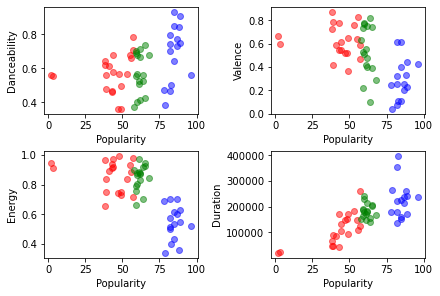

In [33]:
fig1, ax1 = plt.subplots(2,2,layout = 'constrained')
ax1[0,0].scatter(f_days_df['popularity'], f_days_df['danceability'], alpha = 0.5, color = 'red', label = 'Days')
ax1[0,0].scatter(f_loss_df['popularity'], f_loss_df['danceability'], alpha = 0.5, color = 'blue', label = 'Loss')
ax1[0,0].scatter(f_king_df['popularity'], f_king_df['danceability'], alpha = 0.5, color = 'green', label = 'King')
ax1[0,0].set_ylabel('Danceability')
ax1[0,0].set_xlabel('Popularity')
#
ax1[0,1].scatter(f_days_df['popularity'], f_days_df['valence'], alpha = 0.5, color = 'red', label = 'Days')
ax1[0,1].scatter(f_loss_df['popularity'], f_loss_df['valence'], alpha = 0.5, color = 'blue', label = 'Loss')
ax1[0,1].scatter(f_king_df['popularity'], f_king_df['valence'], alpha = 0.5, color = 'green', label = 'King')
ax1[0,1].set_ylabel('Valence')
ax1[0,1].set_xlabel('Popularity')
#
ax1[1,0].scatter(f_days_df['popularity'], f_days_df['energy'], alpha = 0.5, color = 'red', label = 'Days')
ax1[1,0].scatter(f_loss_df['popularity'], f_loss_df['energy'], alpha = 0.5, color = 'blue', label = 'Loss')
ax1[1,0].scatter(f_king_df['popularity'], f_king_df['energy'], alpha = 0.5, color = 'green', label = 'King')
ax1[1,0].set_ylabel('Energy')
ax1[1,0].set_xlabel('Popularity')
#
ax1[1,1].scatter(f_days_df['popularity'], f_days_df['duration_ms'], alpha = 0.5, color = 'red', label = 'Days')
ax1[1,1].scatter(f_loss_df['popularity'], f_loss_df['duration_ms'], alpha = 0.5, color = 'blue', label = 'Loss')
ax1[1,1].scatter(f_king_df['popularity'], f_king_df['duration_ms'], alpha = 0.5, color = 'green', label = 'King')
ax1[1,1].set_ylabel('Duration')
ax1[1,1].set_xlabel('Popularity')
plt.show()